In [1]:
#import the library
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import seaborn as sns
import logging
import os
os.chdir(r'E:\AAA_Labwork\Tcell tissues\v2')
import importlib
import warnings
warnings.filterwarnings("ignore")

import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
from matplotlib.colors import LinearSegmentedColormap
values = [0,1]
colors = [(227, 227, 227), (255, 42, 18)]
norm = plt.Normalize(min(values), max(values))
my_cmap = LinearSegmentedColormap.from_list(
    '', [(norm(value), tuple(np.array(color) / 255)) for value, color in zip(values, colors)])

In [6]:
#This pallete is for colorblinds
my_palette = ['#0351A8','#8CB0E0','#D56D11','#FFBB78','#234E08',
              '#53CB8B','#D30083','#CB788D','#4E195A','#C58CCF',
              '#AA290F','#B03FD1','#E8BCCF','#64605F','#B2AD9A',
              '#D2D30B','#D1BD4F','#06DCF2','#9EDAE5','#517219',
              '#5B43CF','#D92F24','#FFD900','#002F33','#B8A3A3']
donor_palette = ["#be6535","#5437cb","#B2A97D"]
liver_palette = ['#0351A8','#8CB0E0','#D56D11','#FFBB78','#234E08',
              '#D30083','#CB788D','#D2D30B','#D1BD4F','#06DCF2','#9EDAE5','#517219',
              '#5B43CF','#D92F24','#FFD900']
liver_T_palette =   [
    "#81C784","#C8E6C9", #cd4
    '#1976D2', "#252FB9", #MAIT
    "#82D2E9","#4A84A3","#0D47A1","#79b8d3", #cd8ab
    '#B2DFDB', #DNT
    "#20E5C1","#77c0b4"#gd 
                    ] 

In [84]:
liver_immune_palette = [
        '#B2DFDB',
    '#81C784',
    '#C8E6C9',
    '#82D2E9',
    '#4A84A3',
    '#0D47A1',
    '#79B8D3',
    '#1976D2',
    '#252FB9',
    '#20E5C1',
    '#77C0B4',
    '#FFCDD2',
    '#E57373',
    '#EF9A9A',
    '#E53935',
    '#D1C4E9',
    '#9575CD',
    '#512DA8',
    '#FFB27E',
    '#FB8C00',
    '#FF8C42',
    '#D98825',
    '#A65C02'
]
    # 'DN T':               '#B2DFDB',
    # 'CD4 TCM':            '#81C784',
    # 'CD4 TRM':            '#C8E6C9',
    # 'CD8ab TCM':          '#82D2E9',
    # 'CD8ab TEM':          '#4A84A3',
    # 'CD8ab TRM':          '#0D47A1',
    # 'CD8ab Teff':         '#79B8D3',
    # 'CD8aa MAIT':         '#1976D2',
    # 'CD8ab MAIT':         '#252FB9',
    # 'gd TRM':             '#20E5C1',
    # 'gd Teff':            '#77C0B4',
    # 'ILC1-like':          '#FFCDD2',
    # 'KIT+ ILC3':          '#E57373',
    # 'KIT- ILC3-like':     '#EF9A9A',
    # 'NK':                 '#E53935',
    # 'Naive B':            '#D1C4E9',
    # 'Memory B':           '#9575CD',
    # 'Plasma':             '#512DA8',
    # 'CD16- mac':          '#FFB27E',
    # 'M1-like mac':        "#FBE200",
    # 'M2-like mac':        '#FF8C42',
    # 'imm DC':             "#A68C6B",
    # 'pDC':                '#A65C02'

In [35]:
liver_nonimmune_palette =[
    '#4E79A7',
    '#F28E2B',
    '#E15759',
    '#76B7B2',
    '#59A14F',
    '#EDC948',
    '#B07AA1',
    '#FF9DA7',
    '#9C755F'
]

In [42]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [12,6.5]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

In [8]:
adata = sc.read_h5ad(r"liver_annotated.h5ad")

In [9]:
adata.obs['Donor ID']

AAACCTGAGAGACTTA-1-3    Donor AJD3280
AAACCTGAGAGTAATC-1-3    Donor AJD3280
AAACCTGAGCGATATA-1-3    Donor AJD3280
AAACCTGAGCGGCTTC-1-3    Donor AJD3280
AAACCTGAGGAACTGC-1-3    Donor AJD3280
                            ...      
TTTGTCAGTTCCCGAG-1-5    Donor AJKQ118
TTTGTCATCCTACAGA-1-5    Donor AJKQ118
TTTGTCATCGAATGCT-1-5    Donor AJKQ118
TTTGTCATCGCCGTGA-1-5    Donor AJKQ118
TTTGTCATCTAACGGT-1-5    Donor AJKQ118
Name: Donor ID, Length: 22946, dtype: category
Categories (3, object): ['Donor AJD3280', 'Donor AJG2309', 'Donor AJKQ118']

In [10]:
adata.obs['Donor ID'] = adata.obs['batch']

In [11]:
# adata.obs['Donor ID'] = adata.obs['Donor ID'].map({'3':'Donor AJD3280','4':'Donor AJG2309','5':'Donor AJKQ118'})
adata.obs['Donor ID'] = adata.obs['Donor ID'].map({'3':'Donor 1','4':'Donor 2','5':'Donor 3'})

In [12]:
adata = adata[adata.obs['batch'].isin(['3','4'])]

In [13]:
adata.obs['celltype_lowres'].values.categories

Index(['T Cells', 'NK', 'ILC', 'B Cells', 'Plasma Cells', 'Macrophages',
       'Dendritic Cells', 'Erthyroid', 'Mast Progenitor', 'PEC', 'LSEC',
       'Stellate Cells', 'Cholangiocytes', 'Hepatocytes', 'Glial-like Cells'],
      dtype='object')

In [80]:
adata.obs['celltype_highres'].values.categories

Index(['CD16- Macrophage', 'Cholangiocytes', 'Erthyroid', 'Glial-like Cells',
       'Hepatocytes Type 6', 'IL7R+ NK', 'ILC1-like Cells', 'Immature DC',
       'KIT+ ILC3', 'KIT- ILC3-like Cells',
       'Liver Sinusoidal Endothelial Cells zone 1',
       'Liver Sinusoidal Endothelial Cells zone 2', 'M1-like CD16+ Macrophage',
       'M2-like CD16+ Macrophage', 'Mast Progenitor', 'Memory B Cells', 'NK',
       'Naive B Cells', 'Peritoneal Epithelial Cells', 'Plasma Cells',
       'Stellate Cells', 'TCRab CD4 TCM', 'TCRab CD4 TRM', 'TCRab CD8 TCM',
       'TCRab CD8 TEM', 'TCRab CD8 TRM', 'TCRab CD8 effector',
       'TCRab CD8aa MAIT', 'TCRab CD8ab MAIT', 'TCRab DNT', 'TCRgd TRM',
       'TCRgd effector', 'pDC'],
      dtype='object')

In [55]:
adata.obs['celltype_lowres'] = adata.obs['celltype_lowres'].astype('category')

ordered_celltype=['T Cells','NK','ILC','B Cells', 'Plasma Cells',
                  'Macrophages','Dendritic Cells',
                  'Erthyroid','Mast Progenitor',
                  'PEC',  'LSEC','Stellate Cells','Cholangiocytes','Hepatocytes','Glial-like Cells']
adata.obs['celltype_lowres'] = adata.obs['celltype_lowres'].cat.reorder_categories(ordered_celltype)

In [ ]:
adata.obs['celltype_highres'] = adata.obs['celltype_highres'].replace({'IgM Naive B':'Naive B Cells'})
adata.obs['celltype_highres'] = adata.obs['celltype_highres'].replace({'IL7R+ NK':'NK'})

In [15]:
adata3 = adata[adata.obs['batch']=='3']
adata4 = adata[adata.obs['batch']=='4']

In [19]:
adata_immune = adata[adata.obs['celltype_lowres'].isin(['T Cells', 'NK', 'ILC', 'B Cells', 'Plasma Cells', 'Macrophages',
       'Dendritic Cells'])]
adata_nonimmune = adata[~adata.obs['celltype_lowres'].isin(['T Cells', 'NK', 'ILC', 'B Cells', 'Plasma Cells', 'Macrophages',
       'Dendritic Cells'])]

In [86]:
adata_immune.obs['celltype_highres'].values.categories

Index(['CD16- Macrophage', 'ILC1-like Cells', 'Immature DC', 'KIT+ ILC3',
       'KIT- ILC3-like Cells', 'M1-like CD16+ Macrophage',
       'M2-like CD16+ Macrophage', 'Memory B Cells', 'NK', 'Naive B Cells',
       'Plasma Cells', 'TCRab CD4 TCM', 'TCRab CD4 TRM', 'TCRab CD8 TCM',
       'TCRab CD8 TEM', 'TCRab CD8 TRM', 'TCRab CD8 effector',
       'TCRab CD8aa MAIT', 'TCRab CD8ab MAIT', 'TCRab DNT', 'TCRgd TRM',
       'TCRgd effector', 'pDC'],
      dtype='object')

In [81]:
adata_immune.obs['celltype_highres'] = adata_immune.obs['celltype_highres'].replace({'IL7R+ NK':'NK'})

In [87]:
name_map = {
    'CD16- Macrophage':               'CD16- mac',
    'ILC1-like Cells':                'ILC1-like',
    'Immature DC':                    'imm DC',
    'KIT+ ILC3':                      'KIT+ ILC3',
    'KIT- ILC3-like Cells':           'KIT- ILC3-like',
    'M1-like CD16+ Macrophage':       'M1-like mac',
    'M2-like CD16+ Macrophage':       'M2-like mac',
    'Memory B Cells':                 'Memory B',
    'NK':                             'NK',
    'Naive B Cells':                  'Naive B',
    'Plasma Cells':                   'Plasma',
    'TCRab CD4 TCM':                  'CD4 TCM',
    'TCRab CD4 TRM':                  'CD4 TRM',
    'TCRab CD8 TCM':                  'CD8ab TCM',
    'TCRab CD8 TEM':                  'CD8ab TEM',
    'TCRab CD8 TRM':                  'CD8ab TRM',
    'TCRab CD8 effector':             'CD8ab Teff',
    'TCRab CD8aa MAIT':               'CD8aa MAIT',
    'TCRab CD8ab MAIT':               'CD8ab MAIT',
    'TCRab DNT':                      'DN T',
    'TCRgd TRM':                      'gd TRM',
    'TCRgd effector':                 'gd Teff',
    'pDC':                            'pDC'
}

adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres']
adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres_short'].replace(name_map)

In [88]:
adata_immune.obs['celltype_highres_short'].values.categories

Index(['CD16- mac', 'ILC1-like', 'imm DC', 'KIT+ ILC3', 'KIT- ILC3-like',
       'M1-like mac', 'M2-like mac', 'Memory B', 'NK', 'Naive B', 'Plasma',
       'CD4 TCM', 'CD4 TRM', 'CD8ab TCM', 'CD8ab TEM', 'CD8ab TRM',
       'CD8ab Teff', 'CD8aa MAIT', 'CD8ab MAIT', 'DN T', 'gd TRM', 'gd Teff',
       'pDC'],
      dtype='object')

In [89]:
adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres_short'].astype('category')

ordered_celltype=['DN T', 'CD4 TCM', 'CD4 TRM', 'CD8ab TCM', 'CD8ab TEM',
       'CD8ab TRM', 'CD8ab Teff', 'CD8aa MAIT', 'CD8ab MAIT', 'gd TRM',
       'gd Teff','ILC1-like', 'KIT+ ILC3',
       'KIT- ILC3-like', 'NK','Naive B','Memory B',
        'Plasma', 'CD16- mac', 'M1-like mac', 'M2-like mac', 'imm DC',  'pDC']
adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres_short'].cat.reorder_categories(ordered_celltype)

In [27]:
sc.pp.filter_genes(adata_immune, min_counts=1)
sc.pp.highly_variable_genes(adata_immune, flavor='seurat_v3', n_top_genes=2000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata_immune.var['highly_variable'])))
sc.pp.pca(adata_immune, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_immune, n_neighbors = 15, n_pcs = 50)
sc.tl.umap(adata_immune, min_dist = 2, spread = 1.5)


 Number of highly variable genes: 2000


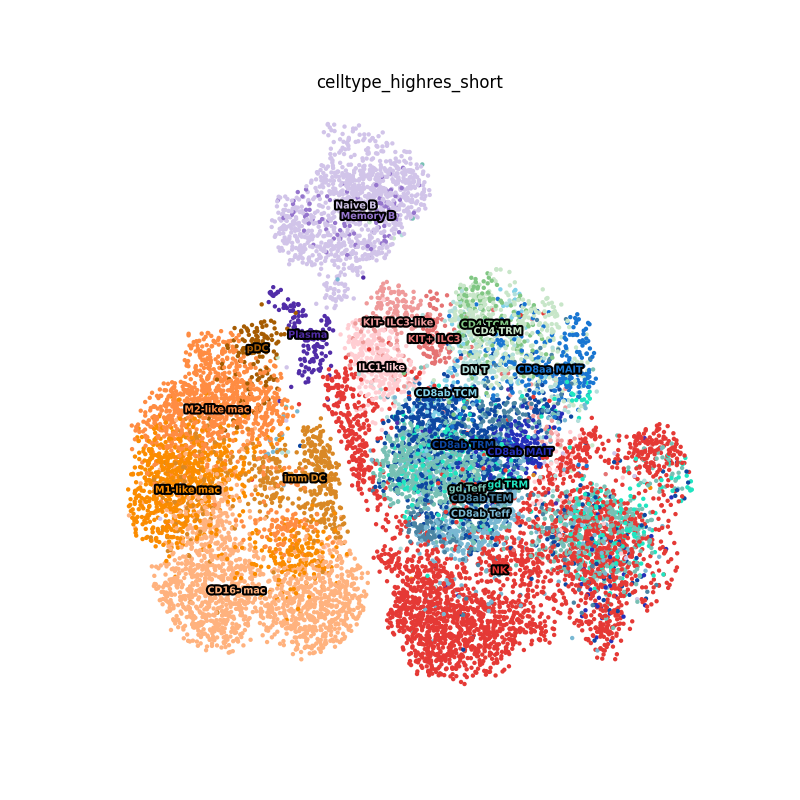

In [90]:
%matplotlib widget
import ipympl
import matplotlib.collections as mcoll
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

class DraggableText:
    def __init__(self, text):
        self.text = text
        text.set_picker(True)  # enable pick events on the text
        self.press = None
        # connect pick event
        text.figure.canvas.mpl_connect('pick_event', self.on_pick)

    def on_pick(self, event):
        if event.artist is not self.text: return
        x0, y0 = self.text.get_position()
        xpress, ypress = event.mouseevent.xdata, event.mouseevent.ydata
        self.press = (x0, y0, xpress, ypress)
        # connect motion and release
        self.cidmotion = self.text.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)
        self.cidrelease = self.text.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)

    def on_motion(self, event):
        if self.press is None or event.xdata is None: return
        x0, y0, xpress, ypress = self.press
        dx, dy = event.xdata - xpress, event.ydata - ypress
        self.text.set_position((x0 + dx, y0 + dy))
        self.text.figure.canvas.draw_idle()

    def on_release(self, event):
        # disconnect the motion/release callbacks
        self.text.figure.canvas.mpl_disconnect(self.cidmotion)
        self.text.figure.canvas.mpl_disconnect(self.cidrelease)
        self.press = None

fig = sc.pl.umap(
    adata_immune,
    color='celltype_highres_short',
    size=40, 
    ncols=1,
    palette=liver_immune_palette,
    return_fig=True,
    legend_fontsize='x-small',
    legend_loc='on data',
    frameon=False
)

axes = fig.get_axes()
for ax in axes:
    # grab the scatter PathCollections
    scatter_objs = [
        coll for coll in ax.collections
        if isinstance(coll, mcoll.PathCollection)
    ]
    # grab all the Text labels
    texts = ax.texts
    
    for i, txt in enumerate(texts):
        label = txt.get_text()                       # e.g. 'CD16- mono'
        facecolor = liver_immune_palette[i]        # grab the correct HEX
        txt.set_color(facecolor)                     # set the text fill
        txt.set_path_effects([                       # add a black outline
            PathEffects.withStroke(linewidth=3, foreground='black')
        ])
    draggables = [DraggableText(txt) for txt in texts]
    #     adjust_text(
#         texts,
#         ax=ax,
#         avoid_objects=scatter_objs,    # ← use this kwarg
#         expand_points=(3, 3),          # ← inflate point bboxes by 3×
#         expand_objects=(1.2, 1.2),     # ← optional, inflate artist bboxes
#         arrowprops=dict(arrowstyle='->', color='gray'),
#         only_move={'points':'y','text':'xy'},
#         force_text=(0.1, 0.25),
#         force_points=(0.1, 0.25),
#         save_steps=False
#     )


In [30]:
adata_nonimmune.obs['celltype_highres'].values.categories

Index(['Cholangiocytes', 'Erthyroid', 'Glial-like Cells', 'Hepatocytes Type 6',
       'Liver Sinusoidal Endothelial Cells zone 1',
       'Liver Sinusoidal Endothelial Cells zone 2', 'Mast Progenitor',
       'Peritoneal Epithelial Cells', 'Stellate Cells'],
      dtype='object')

In [31]:
name_map = {
    'Cholangiocytes':                                'Cholangiocyte',
    'Erthyroid':                                     'Erythroid',
    'Glial-like Cells':                              'Glial-like',
    'Hepatocytes Type 6':                            'Hep6',
    'Liver Sinusoidal Endothelial Cells zone 1':     'LSEC 1',
    'Liver Sinusoidal Endothelial Cells zone 2':     'LSEC 2',
    'Mast Progenitor':                               'Mast prog',
    'Peritoneal Epithelial Cells':                   'Peri epi',
    'Stellate Cells':                                'Stellate'
}

adata_nonimmune.obs['celltype_highres_short'] = adata_nonimmune.obs['celltype_highres']
adata_nonimmune.obs['celltype_highres_short'] = adata_nonimmune.obs['celltype_highres_short'].replace(name_map)

In [32]:
adata_nonimmune.obs['celltype_highres_short'].values.categories

Index(['Cholangiocyte', 'Erythroid', 'Glial-like', 'Hep6', 'LSEC 1', 'LSEC 2',
       'Mast prog', 'Peri epi', 'Stellate'],
      dtype='object')

In [ ]:
# adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres_short'].astype('category')

# ordered_celltype=['DN T', 'CD4 TCM', 'CD4 TRM', 'CD8ab TCM', 'CD8ab TEM',
#        'CD8ab TRM', 'CD8ab Teff', 'CD8aa MAIT', 'CD8ab MAIT', 'gd TRM',
#        'gd Teff','ILC1-like', 'KIT+ ILC3',
#        'KIT- ILC3-like', 'NK', 'IL7R+ NK', 'Naive B','Memory B',
#         'Plasma', 'CD16- mac', 'M1-like mac', 'M2-like mac', 'imm DC',  'pDC']
# adata_immune.obs['celltype_highres_short'] = adata_immune.obs['celltype_highres_short'].cat.reorder_categories(ordered_celltype)

In [33]:
sc.pp.filter_genes(adata_nonimmune, min_counts=1)
sc.pp.highly_variable_genes(adata_nonimmune, flavor='seurat_v3', n_top_genes=2000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata_nonimmune.var['highly_variable'])))
sc.pp.pca(adata_nonimmune, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_nonimmune, n_neighbors = 15, n_pcs = 50)
sc.tl.umap(adata_nonimmune, min_dist = 2, spread = 1.5)


 Number of highly variable genes: 2000


In [56]:
adata_nonimmune.obs['celltype_highres'] = adata_nonimmune.obs['celltype_highres'].replace({'Peritoneal Epithelial Cells':'Portal Endothelial cells'})
adata_nonimmune.obs['celltype_highres_short'] = adata_nonimmune.obs['celltype_highres_short'].replace({'Peri epi':'PEC'})

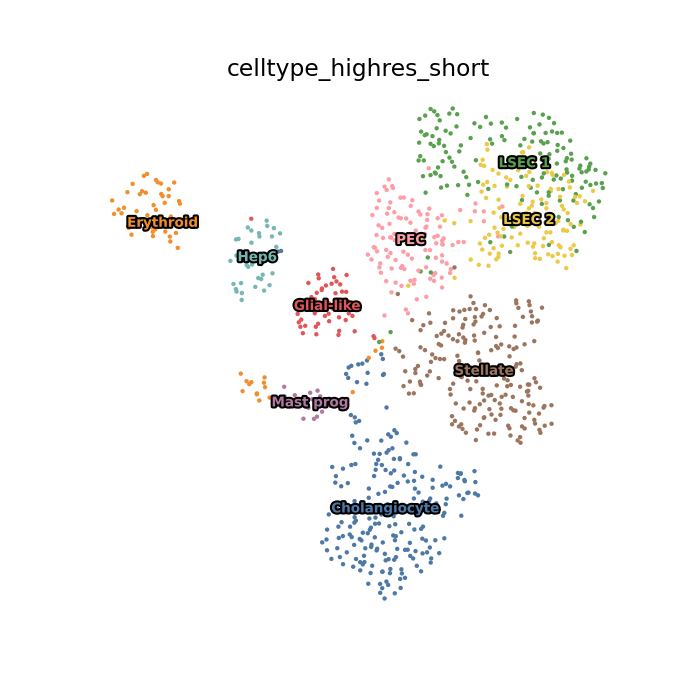

In [57]:
%matplotlib widget

fig = sc.pl.umap(
    adata_nonimmune,
    color='celltype_highres_short',
    size=40, 
    ncols=1,
    palette=liver_nonimmune_palette,
    return_fig=True,
    legend_fontsize='x-small',
    legend_loc='on data',
    frameon=False
)

axes = fig.get_axes()
for ax in axes:
    # grab the scatter PathCollections
    scatter_objs = [
        coll for coll in ax.collections
        if isinstance(coll, mcoll.PathCollection)
    ]
    # grab all the Text labels
    texts = ax.texts
    
    for i, txt in enumerate(texts):
        label = txt.get_text()                       # e.g. 'CD16- mono'
        facecolor = liver_nonimmune_palette[i]        # grab the correct HEX
        txt.set_color(facecolor)                     # set the text fill
        txt.set_path_effects([                       # add a black outline
            PathEffects.withStroke(linewidth=3, foreground='black')
        ])
    draggables = [DraggableText(txt) for txt in texts]
    #     adjust_text(
#         texts,
#         ax=ax,
#         avoid_objects=scatter_objs,    # ← use this kwarg
#         expand_points=(3, 3),          # ← inflate point bboxes by 3×
#         expand_objects=(1.2, 1.2),     # ← optional, inflate artist bboxes
#         arrowprops=dict(arrowstyle='->', color='gray'),
#         only_move={'points':'y','text':'xy'},
#         force_text=(0.1, 0.25),
#         force_points=(0.1, 0.25),
#         save_steps=False
#     )


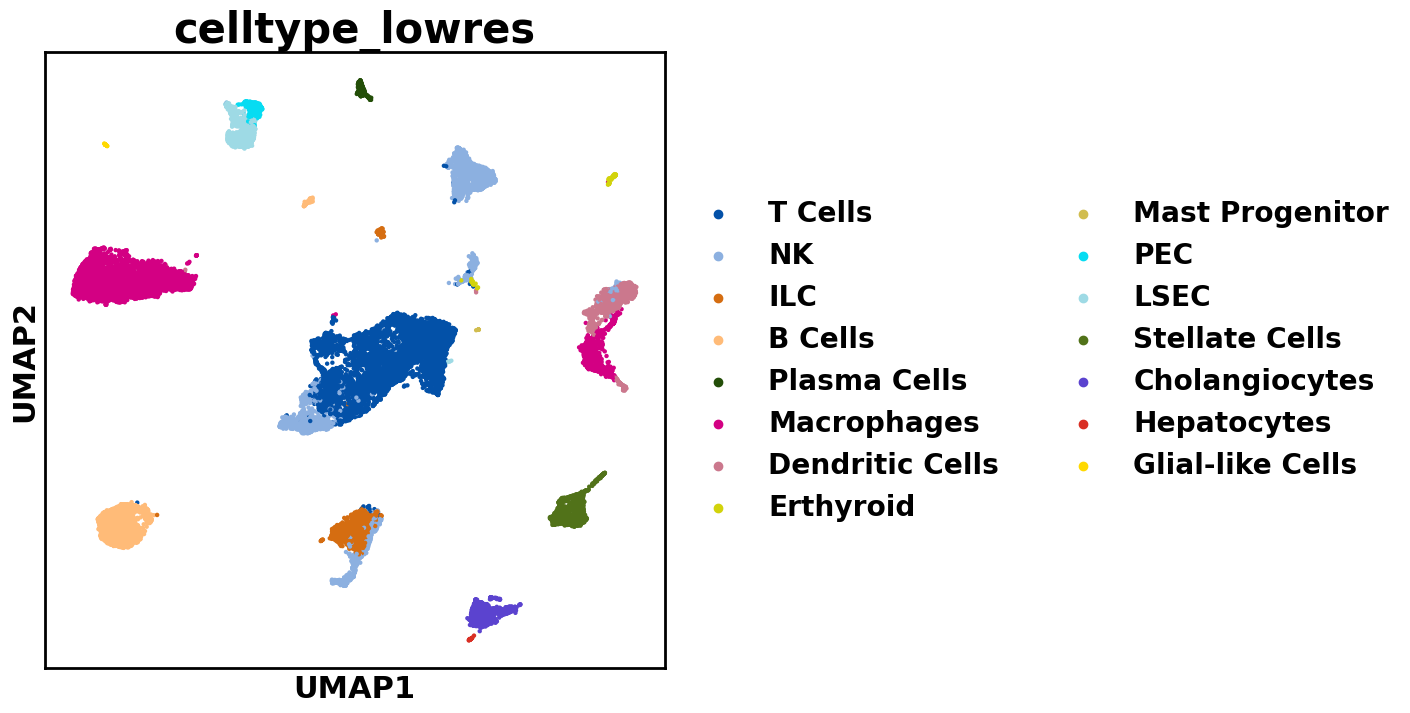

In [56]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

plt.close()
fig = sc.pl.umap(adata, color = ['celltype_lowres'],
                 size = 40, ncols = 1,palette = liver_palette,
                 return_fig = True, legend_fontsize = 'x-large')
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/liver_celltype_low_umap.png',dpi = 300,bbox_inches='tight')

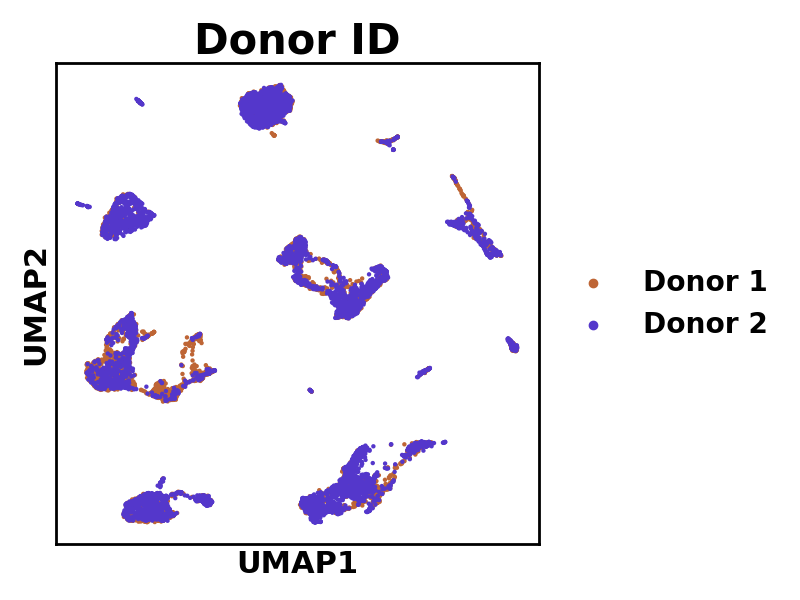

In [ ]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [8,6]

plt.close()
fig = sc.pl.umap(adata, color = ['Donor ID'],
                 size = 40, ncols = 1,palette = donor_palette,
                 return_fig = True, legend_fontsize = 'x-large')
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/liver_donor_umap.png',dpi = 300,bbox_inches='tight')

In [40]:
nonimmune_donor_df = adata_nonimmune.obs.groupby('Donor ID')['celltype_highres_short'].value_counts().unstack(fill_value=0)
nonimmune_donor_df= nonimmune_donor_df.div(nonimmune_donor_df.sum(axis = 0),axis = 1)

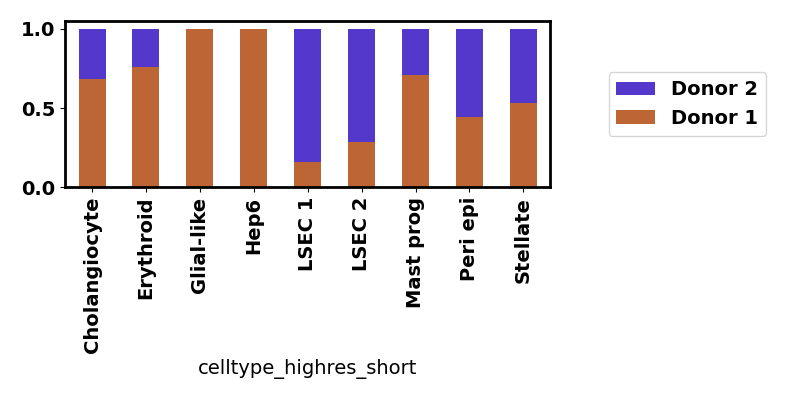

In [58]:
plt.rcParams['figure.figsize'] = [8,4]
nonimmune_donor_df.transpose().plot.bar(stacked = True, color = donor_palette[0:2]).legend(loc='center left',bbox_to_anchor=(1.1, 0.5),reverse= True)
plt.tight_layout()
plt.savefig('vis/liver_nonimmune_donor_contribution.png',dpi = 300,bbox_inches='tight')

In [91]:
immune_donor_df = adata_immune.obs.groupby('Donor ID')['celltype_highres_short'].value_counts().unstack(fill_value=0)
immune_donor_df= immune_donor_df.div(immune_donor_df.sum(axis = 0),axis = 1)

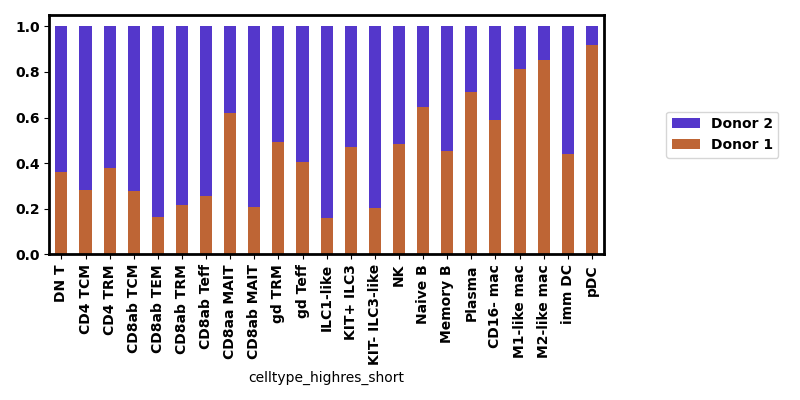

In [92]:
plt.rcParams['figure.figsize'] = [8,4]
immune_donor_df.transpose().plot.bar(stacked = True, color = donor_palette[0:2]).legend(loc='center left',bbox_to_anchor=(1.1, 0.5),reverse= True)
plt.tight_layout()
plt.savefig('vis/liver_immune_donor_contribution.png',dpi = 300,bbox_inches='tight')

In [ ]:
adata3 = adata[adata.obs['batch']=='3']
adata4 = adata[adata.obs['batch']=='4']
adata34T = adata[adata.obs['celltype_lowres'] == 'T Cells']

In [20]:
adata34T.obs['celltype_highres'] = adata34T.obs['celltype_highres'].astype('category')

ordered_celltype_T=['TCRab CD4 TCM',
 'TCRab CD4 TRM',
 'TCRab CD8aa MAIT',
 'TCRab CD8ab MAIT',
 'TCRab CD8 TCM',
 'TCRab CD8 TEM',
 'TCRab CD8 TRM',
 'TCRab CD8 effector',
 'TCRab DNT',
 'TCRgd TRM',
 'TCRgd effector']
adata34T.obs['celltype_highres'] = adata34T.obs['celltype_highres'].cat.reorder_categories(ordered_celltype_T)

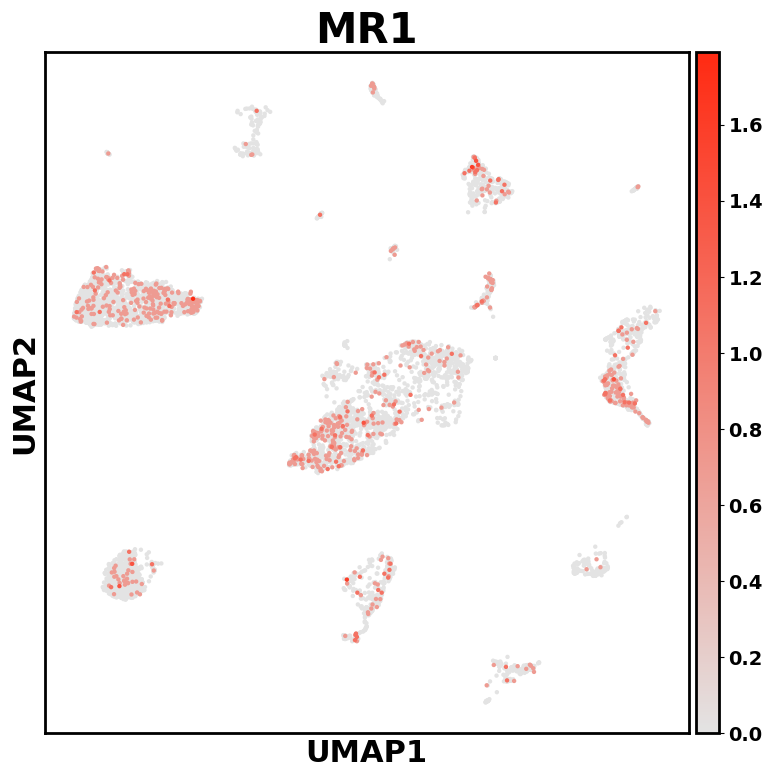

In [31]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

plt.close()
fig = sc.pl.umap(adata3, color = ['MR1'],
                 size = 40, ncols = 1,palette = liver_palette,
                 return_fig = True, legend_fontsize = 'x-large',cmap = my_cmap)
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/liver_3_MR1_umap.png',dpi = 300,bbox_inches='tight')

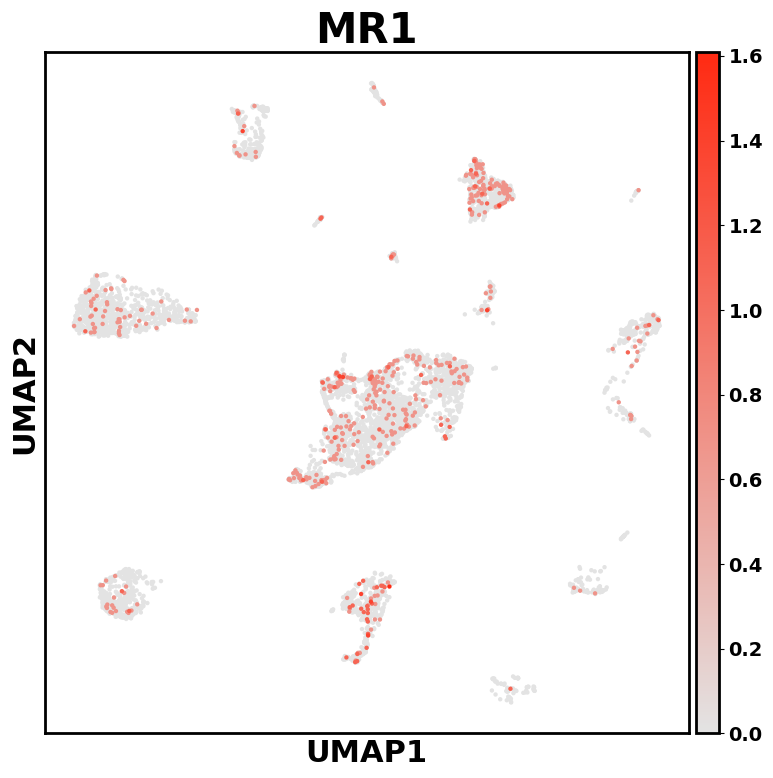

In [32]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

plt.close()
fig = sc.pl.umap(adata4, color = ['MR1'],
                 size = 40, ncols = 1,palette = liver_palette,
                 return_fig = True, legend_fontsize = 'x-large',cmap = my_cmap)
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/liver_4_MR1_umap.png',dpi = 300,bbox_inches='tight')

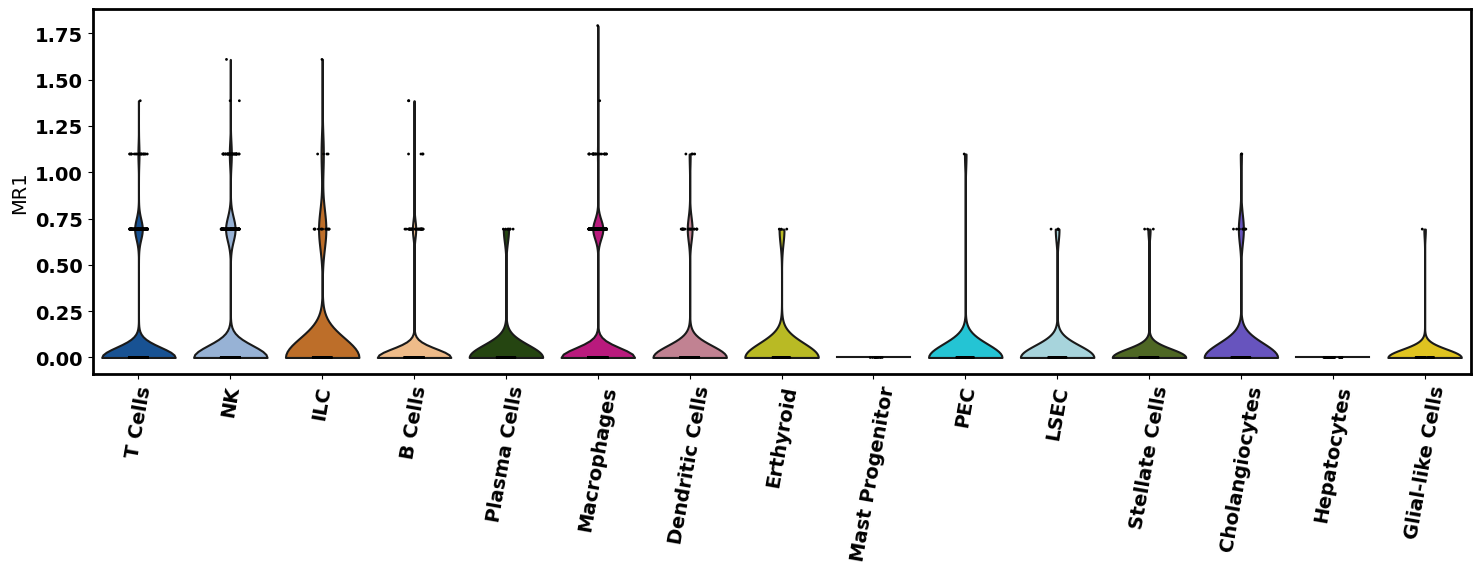

In [53]:
plt.rcParams['figure.figsize'] = [14,5]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})
sc.pl.violin(adata3, groupby='celltype_lowres', keys = 'MR1',rotation=80,size = 2,sacle = 'area',save = '3_MR1_violin')

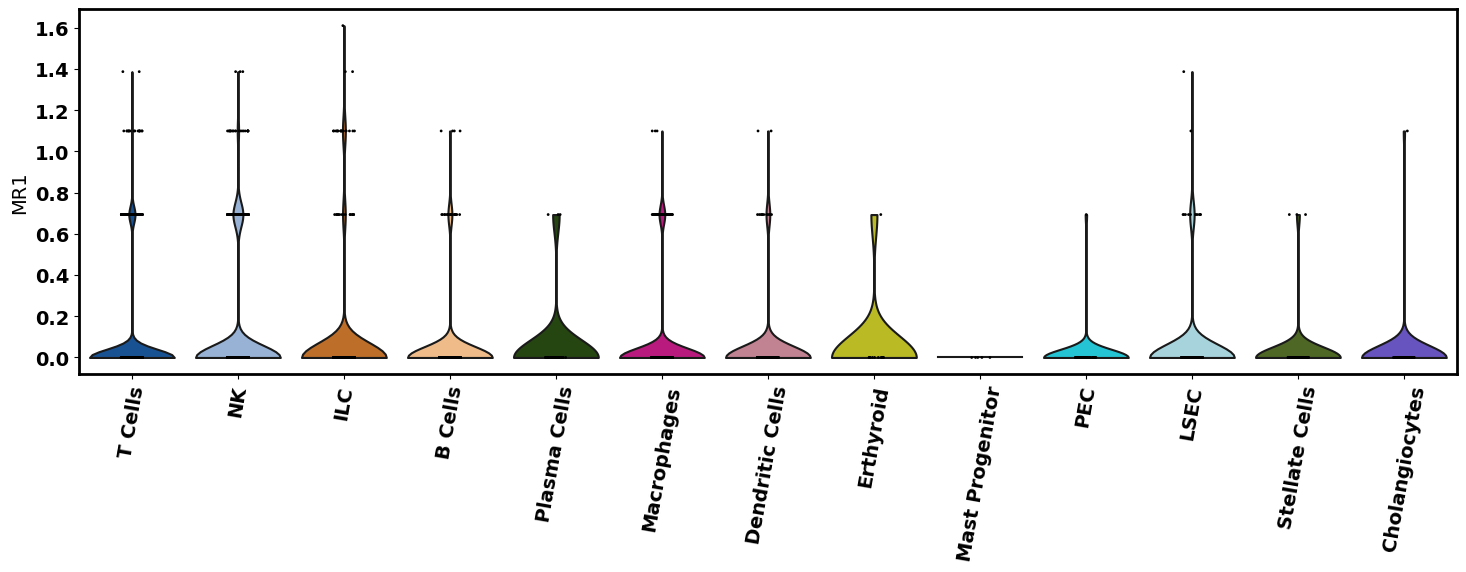

In [54]:
sc.pl.violin(adata4, groupby='celltype_lowres', keys = 'MR1',rotation=80,sacle = 'area',size = 2,save = '4_MR1_violin')

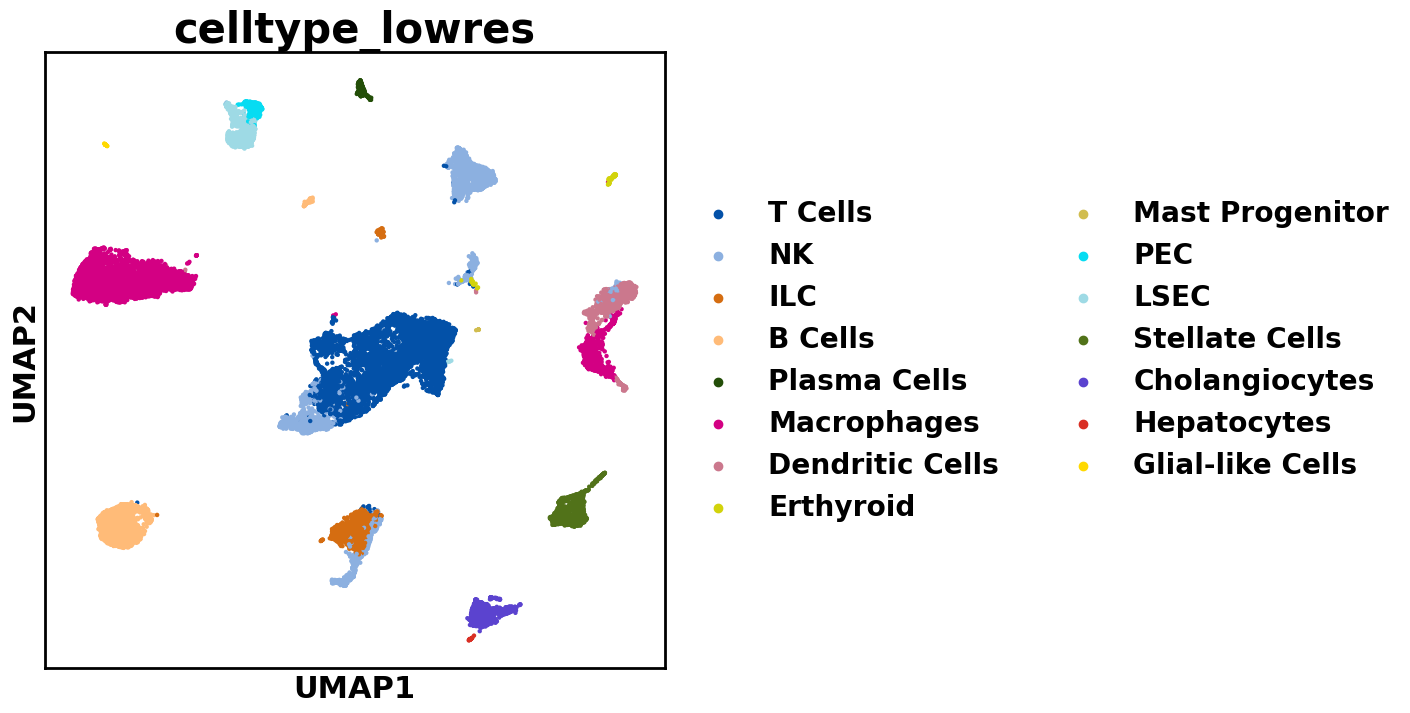

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

plt.close()
fig = sc.pl.umap(adata, color = ['celltype_lowres'],
                 size = 40, ncols = 1,palette = liver_palette,
                 return_fig = True, legend_fontsize = 'x-large')
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/liver_celltype_low_umap.png',dpi = 300,bbox_inches='tight')

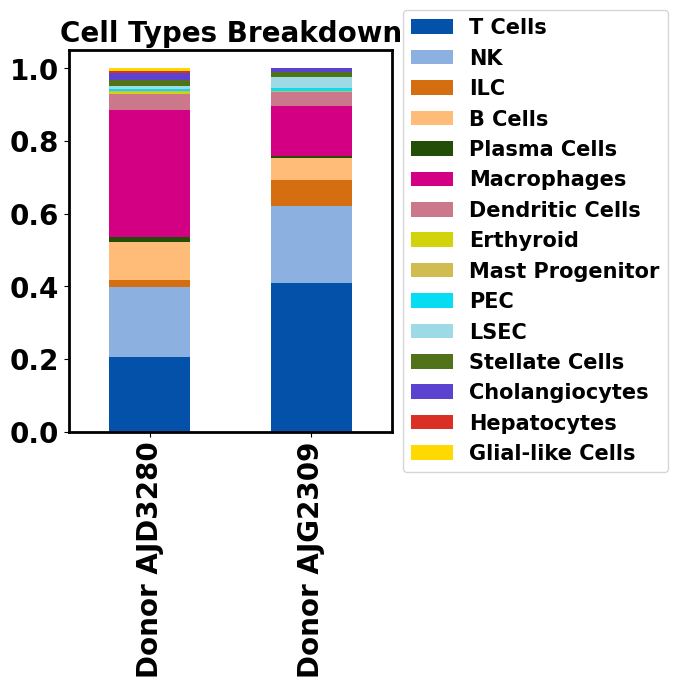

In [59]:
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

expand_subtype = pd.DataFrame()
for i in set(adata34.obs['Donor ID']):
    pdtemp = pd.DataFrame(adata34[adata34.obs['Donor ID'] == i,:].obs['celltype_lowres'].value_counts(normalize = True))
    pdtemp = pdtemp.rename({'proportion': i }, axis='columns')
    expand_subtype = pd.concat([expand_subtype, pdtemp], ignore_index=False, axis=1)
expand_subtype = expand_subtype.reindex(index =ordered_celltype)
expand_subtype.transpose().plot.bar(stacked=True,color = adata34.uns['celltype_lowres_colors'],fontsize = 20 ).legend(loc='center left',bbox_to_anchor=(1.0, 0.5),fontsize = 15)
plt.title(label = 'Cell Types Breakdown', fontsize = 20,fontweight = 'bold')
plt.tight_layout()
plt.savefig('vis/liver_celltype_breakdown.png',dpi = 300)

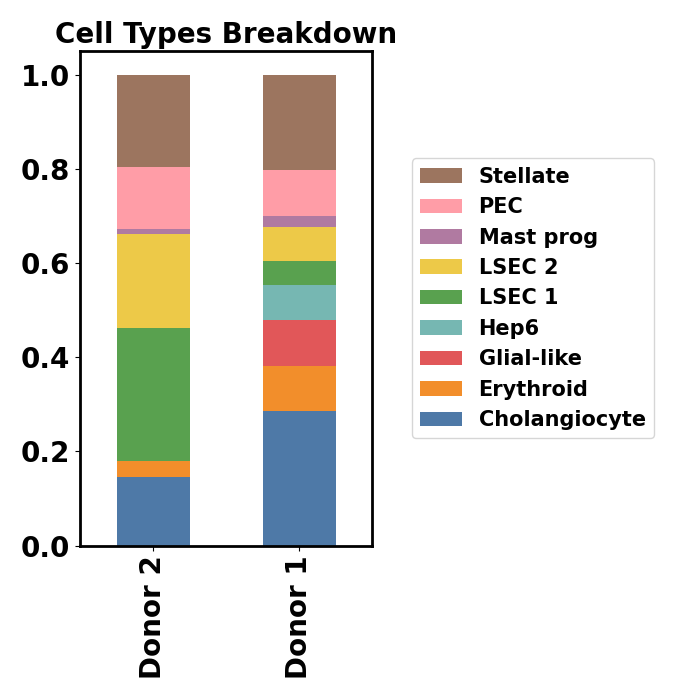

In [59]:
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

expand_subtype = pd.DataFrame()
for i in set(adata_nonimmune.obs['Donor ID']):
    pdtemp = pd.DataFrame(adata_nonimmune[adata_nonimmune.obs['Donor ID'] == i,:].obs['celltype_highres_short'].value_counts(normalize = True))
    pdtemp = pdtemp.rename({'proportion': i }, axis='columns')
    expand_subtype = pd.concat([expand_subtype, pdtemp], ignore_index=False, axis=1)
expand_subtype = expand_subtype.reindex(index =adata_nonimmune.obs['celltype_highres_short'].values.categories)
expand_subtype.transpose().plot.bar(stacked=True,color = adata_nonimmune.uns['celltype_highres_short_colors'],fontsize = 20 ).legend(loc='center left',bbox_to_anchor=(1.1, 0.5),fontsize = 15, reverse=True)
plt.title(label = 'Cell Types Breakdown', fontsize = 20,fontweight = 'bold')
plt.tight_layout()
plt.savefig('vis/liver_nonimmune_celltype_breakdown.png',dpi = 300)

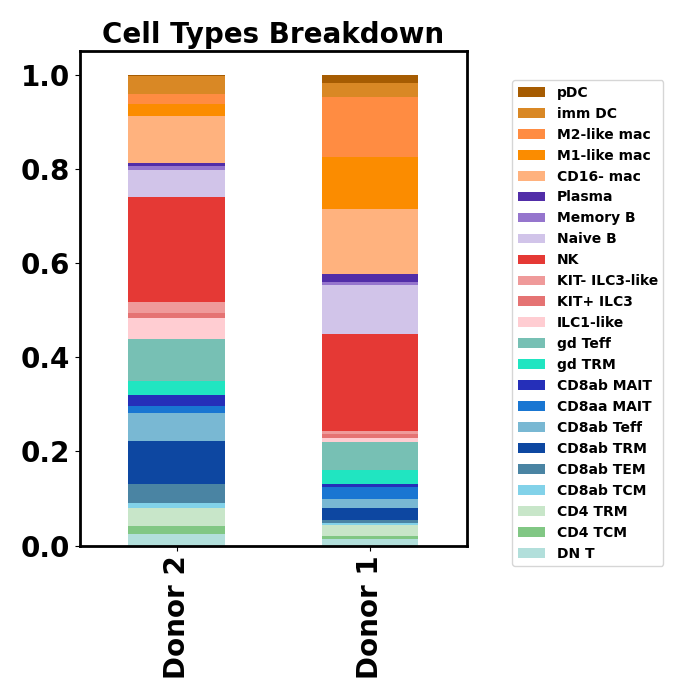

In [93]:
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

expand_subtype = pd.DataFrame()
for i in set(adata_immune.obs['Donor ID']):
    pdtemp = pd.DataFrame(adata_immune[adata_immune.obs['Donor ID'] == i,:].obs['celltype_highres_short'].value_counts(normalize = True))
    pdtemp = pdtemp.rename({'proportion': i }, axis='columns')
    expand_subtype = pd.concat([expand_subtype, pdtemp], ignore_index=False, axis=1)
expand_subtype = expand_subtype.reindex(index =adata_immune.obs['celltype_highres_short'].values.categories)
expand_subtype.transpose().plot.bar(stacked=True,color = adata_immune.uns['celltype_highres_short_colors'],fontsize = 20 ).legend(loc='center left',bbox_to_anchor=(1.1, 0.45),fontsize = 10, reverse=True)
plt.title(label = 'Cell Types Breakdown', fontsize = 20,fontweight = 'bold')
plt.tight_layout()
plt.savefig('vis/liver_immune_celltype_breakdown.png',dpi = 300)

In [60]:
adata_nonimmune.obs['celltype_highres_short'].values.categories

Index(['Cholangiocyte', 'Erythroid', 'Glial-like', 'Hep6', 'LSEC 1', 'LSEC 2',
       'Mast prog', 'PEC', 'Stellate'],
      dtype='object')

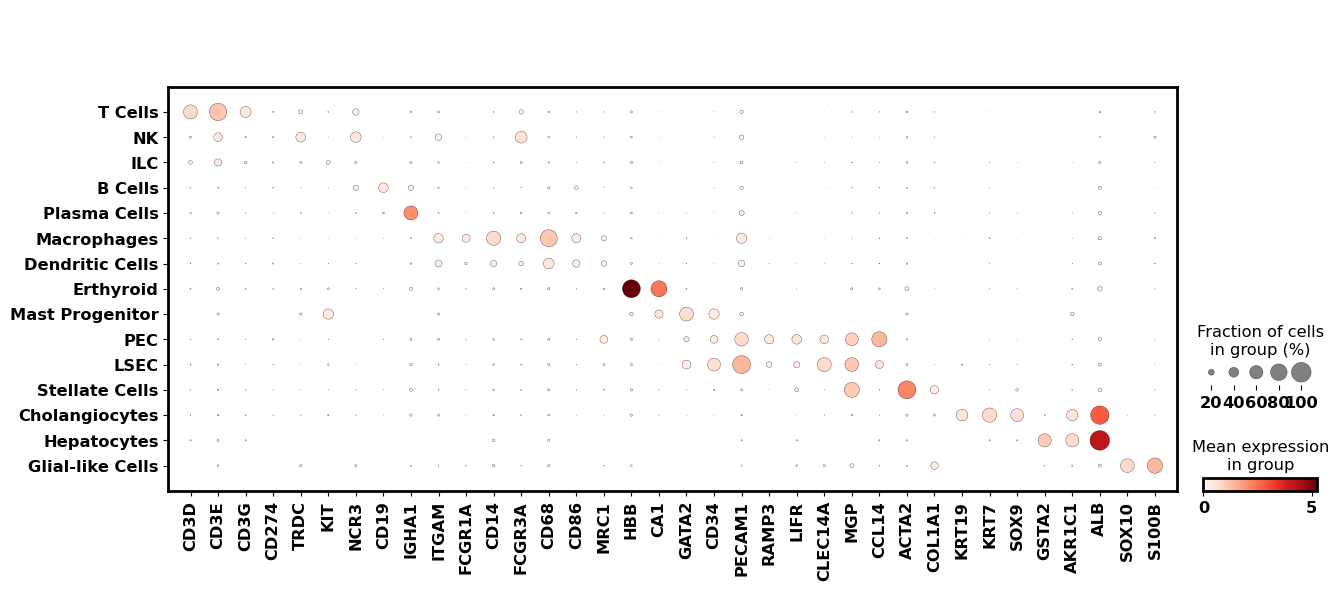

In [ ]:
sc.pl.dotplot(adata, var_names=['CD3D','CD3E','CD3G','CD274','TRDC','KIT','NCR3','CD19','IGHA1','ITGAM','FCGR1A','CD14','FCGR3A','CD68','CD86','MRC1',
                                'HBB','CA1','GATA2','CD34','PECAM1','RAMP3','LIFR','CLEC14A','MGP','CCL14','ACTA2','COL1A1',
                                'KRT19','KRT7','SOX9','GSTA2','AKR1C1','ALB','SOX10','S100B'],groupby= 'celltype_lowres')

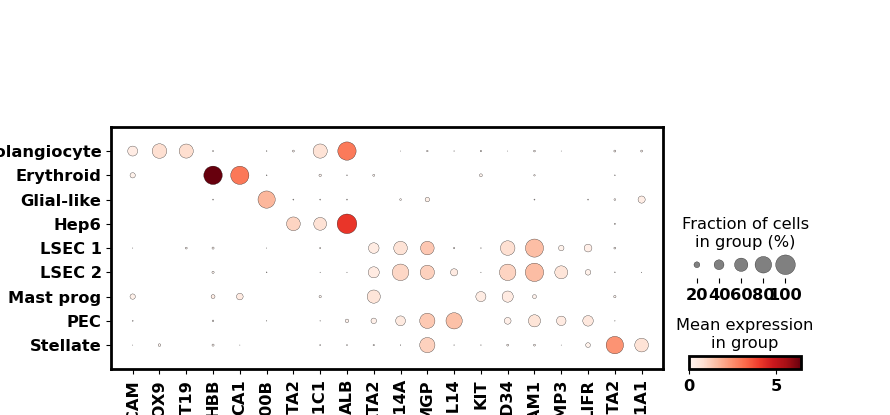

In [63]:
sc.pl.dotplot(adata_nonimmune, var_names=['EPCAM','SOX9','KRT19','HBB','CA1','S100B','GSTA2','AKR1C1','ALB','GATA2','CLEC14A','MGP','CCL14',
                                          'KIT','CD34','PECAM1','RAMP3','LIFR','ACTA2','COL1A1'],groupby= 'celltype_highres_short')

In [133]:
gene_list = ['EPCAM','SOX9','KRT19','HBB','CA1','S100B','GSTA2','AKR1C1','ALB','GATA2','CLEC14A','MGP','CCL14',
                                          'KIT','CD34','PECAM1','RAMP3','LIFR','ACTA2','COL1A1']
df1 = adata_nonimmune[:,gene_list].to_df()
df1['celltype_highres_short'] = adata_nonimmune.obs['celltype_highres_short']
expression_matrix = df1.groupby('celltype_highres_short').mean()

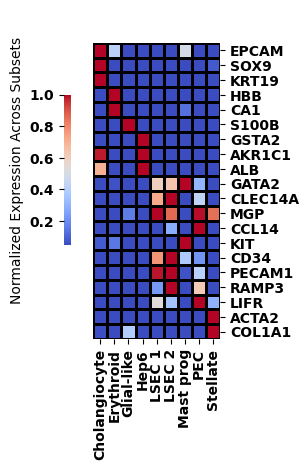

In [137]:
%matplotlib inline
plt.rcParams.update({'font.size': 10, 'font.weight': 'heavy','axes.linewidth':2,'figure.figsize':[8,8]})
#plt.rcParams.update(plt.rcParamsDefault)
kwargs = {'cmap': 'coolwarm'}
clustergrid = sns.clustermap(expression_matrix.T,figsize = (2.5,5),linewidths=2,standard_scale=0,
               linecolor = 'k',dendrogram_ratio = 0.1, colors_ratio = 0.5,vmax = 1,vmin = 0.05,
               row_cluster = False,col_cluster = False,cbar_kws={'label': 'Normalized Expression Across Subsets','location':"left"},
               **kwargs)
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([0, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')

plt.savefig('vis/liver_nonimmune_heatmap.png',dpi = 300,bbox_inches='tight')

In [94]:
adata_immune.obs['celltype_highres_short'].values.categories

Index(['DN T', 'CD4 TCM', 'CD4 TRM', 'CD8ab TCM', 'CD8ab TEM', 'CD8ab TRM',
       'CD8ab Teff', 'CD8aa MAIT', 'CD8ab MAIT', 'gd TRM', 'gd Teff',
       'ILC1-like', 'KIT+ ILC3', 'KIT- ILC3-like', 'NK', 'Naive B', 'Memory B',
       'Plasma', 'CD16- mac', 'M1-like mac', 'M2-like mac', 'imm DC', 'pDC'],
      dtype='object')

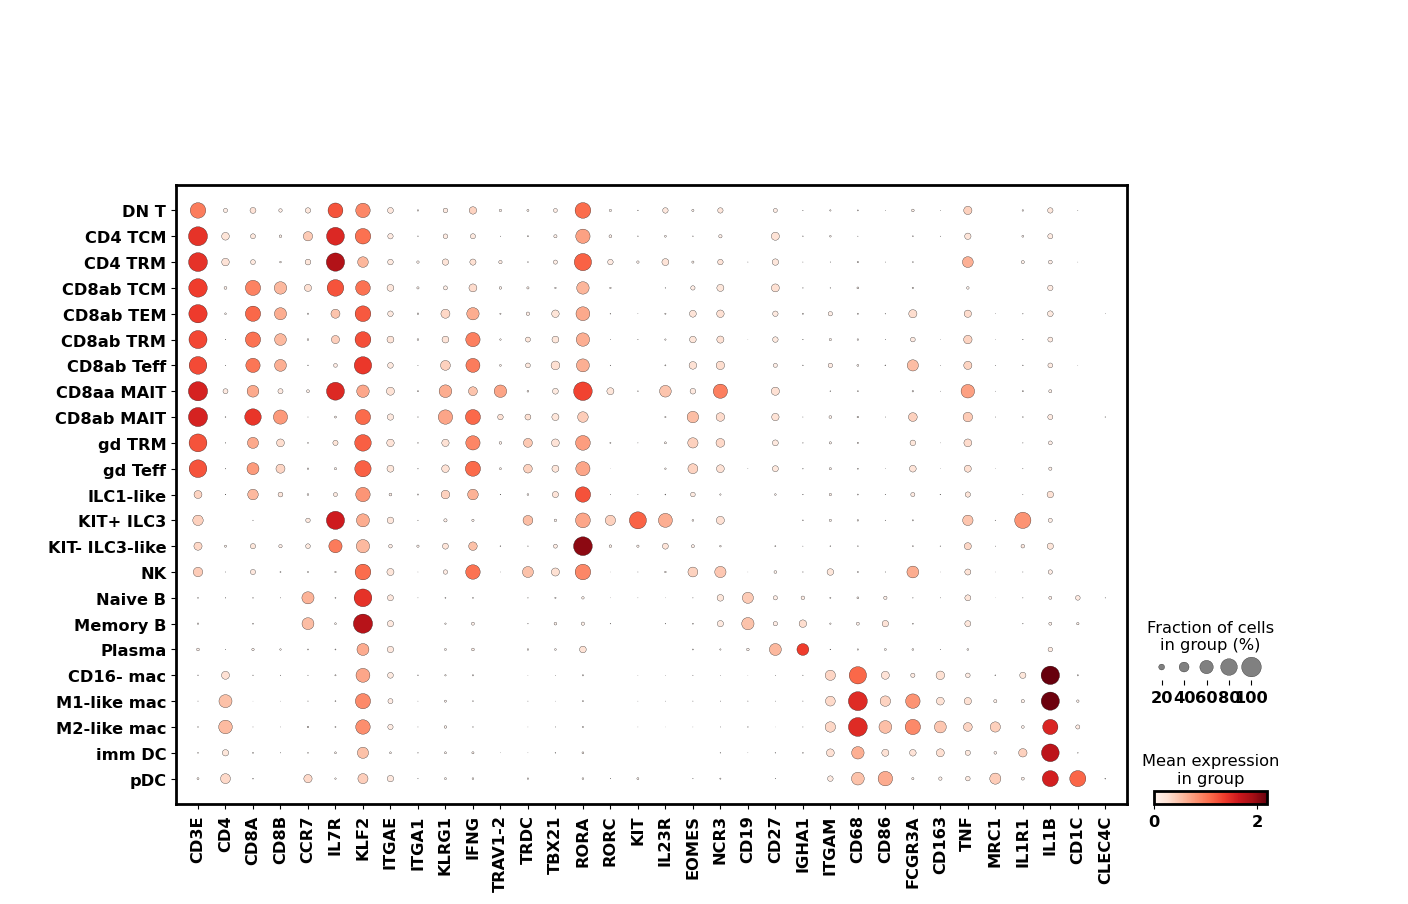

In [ ]:
sc.pl.dotplot(adata_immune, var_names=['CD3E','CD4','CD8A','CD8B','CCR7','IL7R','KLF2',
                                   'ITGAE','ITGA1','KLRG1','IFNG','TRAV1-2','TRDC',
                                   'TBX21','RORA','RORC','KIT','IL23R','EOMES','NCR3','CD19','CD27','IGHA1',
                                   'ITGAM','CD68','CD86','FCGR3A','CD163','TNF','MRC1','IL1B','IL1R1','CD1C','CLEC4C'],groupby= 'celltype_highres_short')

In [71]:
adata.obs['leiden']

AAACCTGAGAGACTTA-1-3    2
AAACCTGAGAGTAATC-1-3    0
AAACCTGAGCGATATA-1-3    1
AAACCTGAGCGGCTTC-1-3    2
AAACCTGAGGAACTGC-1-3    3
                       ..
TTTGTCAGTTTGTGTG-1-4    1
TTTGTCATCCAAGCCG-1-4    8
TTTGTCATCCGAACGC-1-4    5
TTTGTCATCCTCAACC-1-4    0
TTTGTCATCGTAGATC-1-4    0
Name: leiden, Length: 14036, dtype: category
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']

In [139]:
gene_list = ['CD3E','CD4','CD8A','CD8B','CCR7','IL7R','KLF2',
                                   'ITGAE','ITGA1','KLRG1','IFNG','TRAV1-2','TRDC',
                                   'TBX21','RORA','RORC','KIT','IL23R','EOMES','NCR3','CD19','CD27','IGHA1',
                                   'ITGAM','CD68','CD86','FCGR3A','CD163','TNF','MRC1','IL1B','IL1R1','CD1C','CLEC4C']
df1 = adata_immune[:,gene_list].to_df()
df1['celltype_highres_short'] = adata_immune.obs['celltype_highres_short']
expression_matrix = df1.groupby('celltype_highres_short').mean()

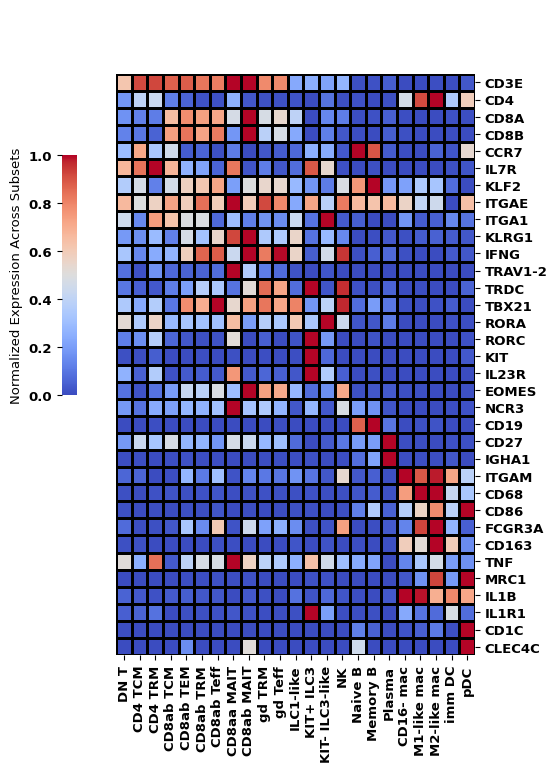

In [142]:
%matplotlib inline
plt.rcParams.update({'font.size': 9.5, 'font.weight': 'heavy','axes.linewidth':2,'figure.figsize':[8,8]})
#plt.rcParams.update(plt.rcParamsDefault)
kwargs = {'cmap': 'coolwarm'}
clustergrid = sns.clustermap(expression_matrix.T,figsize = (5,8),linewidths=2,standard_scale=0,
               linecolor = 'k',dendrogram_ratio = 0.1, colors_ratio = 0.5,vmax = 1,vmin = 0,
               row_cluster = False,col_cluster = False,cbar_kws={'label': 'Normalized Expression Across Subsets','location':"left"},
               **kwargs)
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([0, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')

plt.savefig('vis/liver_immune_heatmap.png',dpi = 300,bbox_inches='tight')

In [143]:
adata34T = adata_immune[adata_immune.obs['celltype_lowres'] == 'T Cells']

In [144]:
adata34T.obs['celltype_highres'] = adata34T.obs['celltype_highres'].astype('category')

ordered_celltype_T=['TCRab CD4 TCM',
 'TCRab CD4 TRM',
 'TCRab CD8aa MAIT',
 'TCRab CD8ab MAIT',
 'TCRab CD8 TCM',
 'TCRab CD8 TEM',
 'TCRab CD8 TRM',
 'TCRab CD8 effector',
 'TCRab DNT',
 'TCRgd TRM',
 'TCRgd effector']
adata34T.obs['celltype_highres'] = adata34T.obs['celltype_highres'].cat.reorder_categories(ordered_celltype_T)

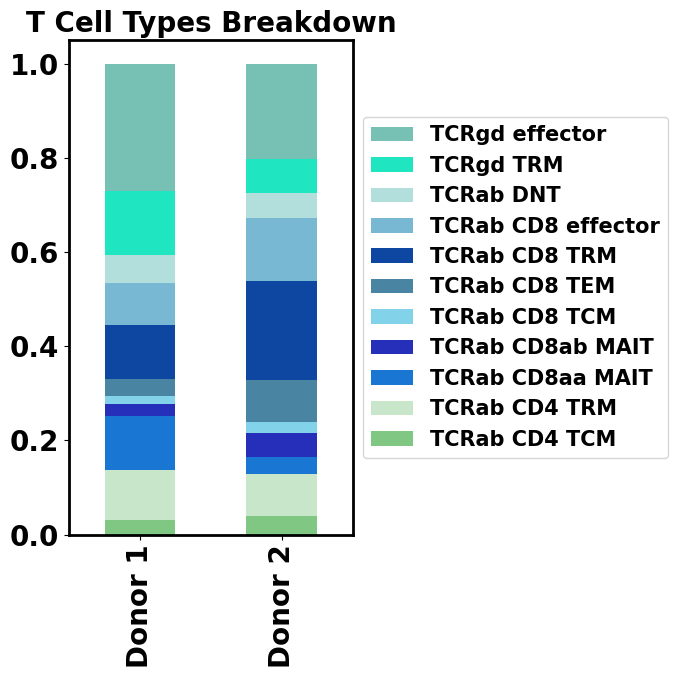

In [155]:
plt.rcParams['figure.figsize'] = [7,7]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

expand_subtype = pd.DataFrame()
for i in set(adata34T.obs['Donor ID']):
    pdtemp = pd.DataFrame(adata34T[adata34T.obs['Donor ID'] == i,:].obs['celltype_highres'].value_counts(normalize = True))
    pdtemp = pdtemp.rename({'proportion': i }, axis='columns')
    expand_subtype = pd.concat([expand_subtype, pdtemp], ignore_index=False, axis=1)
expand_subtype = expand_subtype.reindex(index =ordered_celltype_T)
expand_subtype[['Donor 1','Donor 2']].transpose().plot.bar(stacked=True,fontsize = 20, color = liver_T_palette).legend(loc='center left',bbox_to_anchor=(1.0, 0.5),fontsize = 15,reverse = True)
plt.title(label = 'T Cell Types Breakdown', fontsize = 20,fontweight = 'bold')
plt.tight_layout()
plt.savefig('vis/liverT_celltype_breakdown.png',dpi = 300)

In [91]:
adata3T = adata3[adata3.obs['celltype_lowres'] == 'T Cells']

In [92]:
adata3T.obs['celltype_highres'].value_counts()#['celltype_highres']

celltype_highres
TCRgd effector        390
TCRgd TRM             198
TCRab CD8 TRM         166
TCRab CD8aa MAIT      166
TCRab CD4 TRM         154
TCRab CD8 effector    129
TCRab DNT              87
TCRab CD8 TEM          51
TCRab CD4 TCM          44
TCRab CD8ab MAIT       39
TCRab CD8 TCM          25
Name: count, dtype: int64

In [93]:
adata4T = adata4[adata4.obs['celltype_lowres'] == 'T Cells']

In [94]:
adata4T.obs['celltype_highres'].value_counts()#['celltype_highres']

celltype_highres
TCRab CD8 TRM         600
TCRgd effector        578
TCRab CD8 effector    379
TCRab CD8 TEM         259
TCRab CD4 TRM         254
TCRgd TRM             204
TCRab DNT             154
TCRab CD8ab MAIT      148
TCRab CD4 TCM         113
TCRab CD8aa MAIT      101
TCRab CD8 TCM          65
Name: count, dtype: int64

In [95]:
expand_subtype

,Donor AJD3280,Donor AJG2309
celltype_highres,,
TCRab CD4 TCM,0.030366,0.039580
TCRab CD4 TRM,0.106280,0.088967
TCRab CD8aa MAIT,0.114562,0.035377
TCRab CD8ab MAIT,0.026915,0.051839
TCRab CD8 TCM,0.017253,0.022767
TCRab CD8 TEM,0.035197,0.090718
TCRab CD8 TRM,0.114562,0.210158
TCRab CD8 effector,0.089027,0.132750
TCRab DNT,0.060041,0.053940


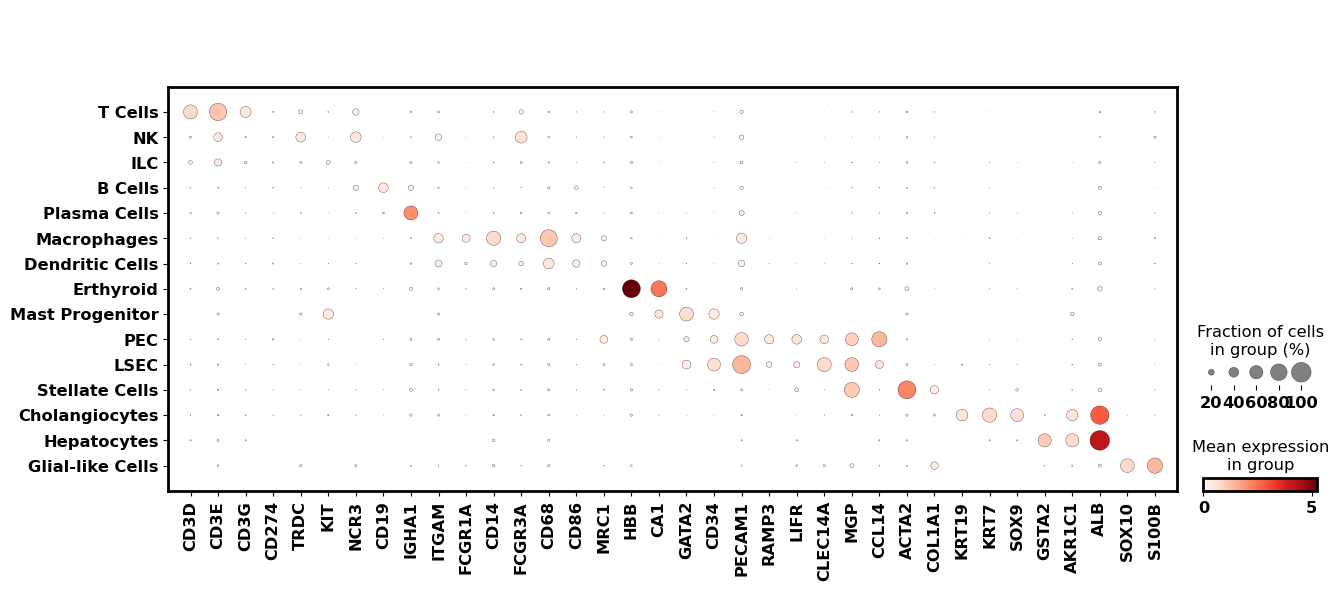

In [66]:
sc.pl.dotplot(adata, var_names=['CD3D','CD3E','CD3G','CD274','TRDC','KIT','NCR3','CD19','IGHA1','ITGAM','FCGR1A','CD14','FCGR3A','CD68','CD86','MRC1',
                                'HBB','CA1','GATA2','CD34','PECAM1','RAMP3','LIFR','CLEC14A','MGP','CCL14','ACTA2','COL1A1',
                                'KRT19','KRT7','SOX9','GSTA2','AKR1C1','ALB','SOX10','S100B'],groupby= 'celltype_lowres')

In [61]:
os.chdir(r'E:\AAA_Labwork\Tcell tissues\v2')
adata.write('liver_annotated.h5ad')

In [10]:
gene_list = ['CD3D','CD3E','CD3G','CD247','TRDC','KIT','NCR3','CD19','IGHA1','ITGAM','FCGR1A','CD14','FCGR3A','CD68','CD86','MRC1',
                                'HBB','CA1','GATA2','CD34','PECAM1','RAMP3','LIFR','CLEC14A','MGP','CCL14','ACTA2','COL1A1',
                                'KRT19','KRT7','SOX9','GSTA2','AKR1C1','ALB','SOX10','S100B']
df1 = adata[:,gene_list].to_df()
df1['celltype_lowres'] = adata.obs['celltype_lowres']
expression_matrix = df1.groupby('celltype_lowres').mean()

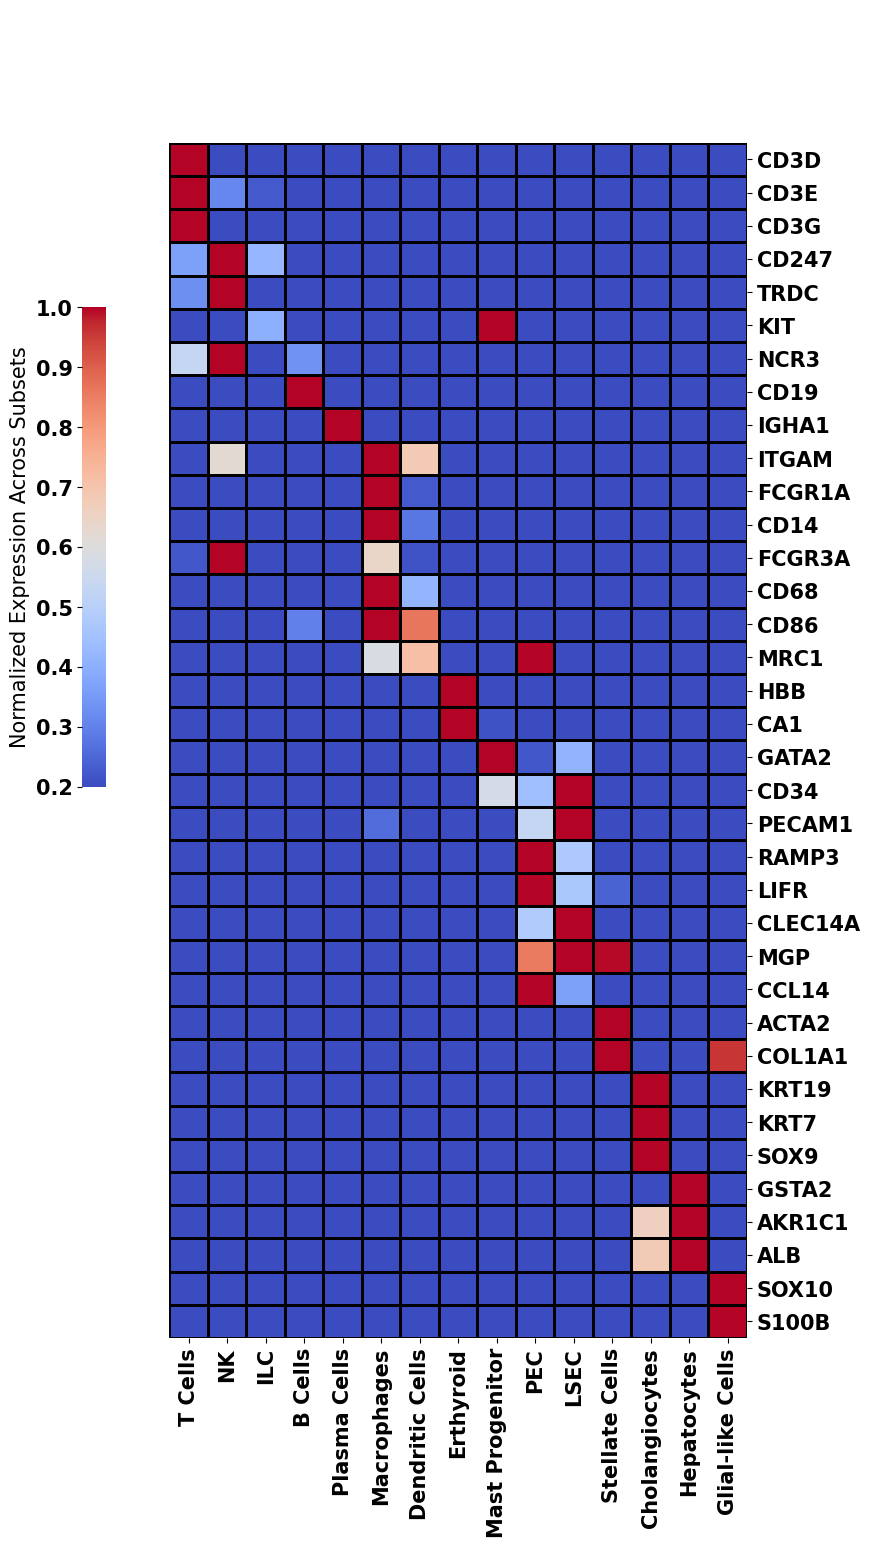

In [11]:
%matplotlib inline
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2,'figure.figsize':[8,8]})
#plt.rcParams.update(plt.rcParamsDefault)
kwargs = {'cmap': 'coolwarm'}
clustergrid = sns.clustermap(expression_matrix.T,figsize = (8,16),linewidths=2,standard_scale=0,
               linecolor = 'k',dendrogram_ratio = 0.1, colors_ratio = 0.5,vmax = 1,vmin = 0.2,
               row_cluster = False,col_cluster = False,cbar_kws={'label': 'Normalized Expression Across Subsets','location':"left"},
               **kwargs)
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([0, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')

plt.savefig('vis/liver_heatmap.png',dpi = 300,bbox_inches='tight')

In [21]:
gene_list = ['TRDC','CD4','CD8A','CD8B','CCR7','SELL','IL7R','CD44','S1PR1','KLF2',
                                   'ITGAE','ITGA1','KLRG1','GZMB','PRF1','NKG7','TRAV1-2','RORC','FOXP3']
df1 = adata34T[:,gene_list].to_df()
df1['celltype_highres'] = adata34T.obs['celltype_highres']
expression_matrix = df1.groupby('celltype_highres').mean()

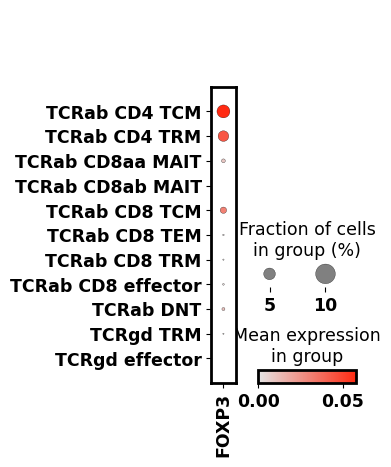

In [ ]:
# The dot looks like they
sc.pl.dotplot(adata34T, ['FOXP3'], groupby = 'celltype_highres', cmap = my_cmap)

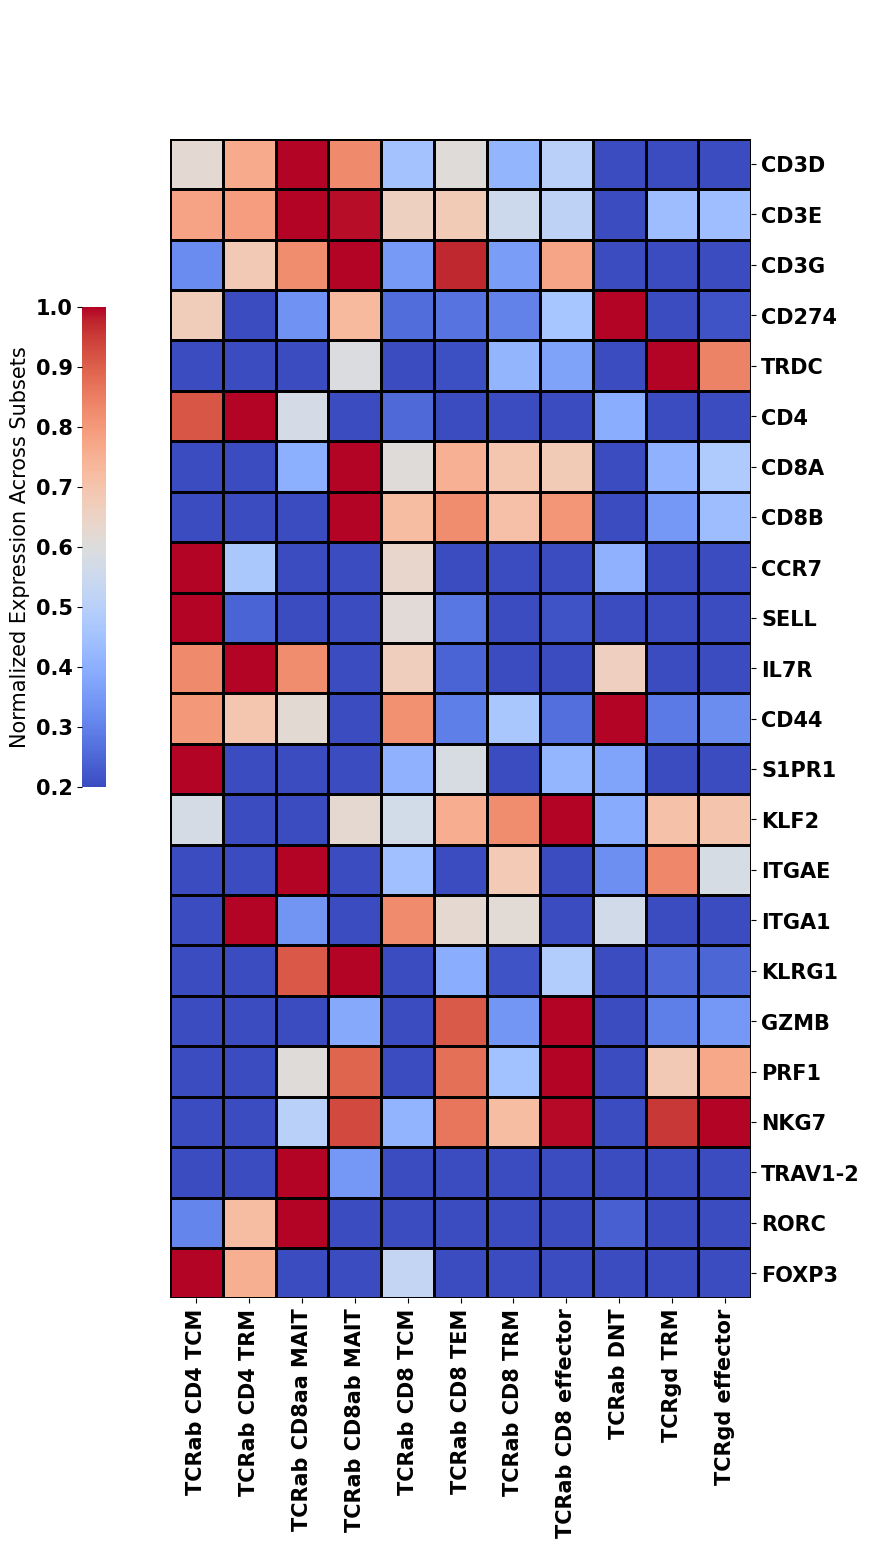

In [97]:
%matplotlib inline
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2,'figure.figsize':[8,8]})
#plt.rcParams.update(plt.rcParamsDefault)
kwargs = {'cmap': 'coolwarm'}
clustergrid = sns.clustermap(expression_matrix.T,figsize = (8,16),linewidths=2,standard_scale=0,
               linecolor = 'k',dendrogram_ratio = 0.1, colors_ratio = 0.5,vmax = 1,vmin = 0.2,
               row_cluster = False,col_cluster = False,cbar_kws={'label': 'Normalized Expression Across Subsets','location':"left"},
               **kwargs)
for a in clustergrid.ax_col_dendrogram.collections:
        a.set_linewidth(2)
clustergrid.ax_cbar.set_position([0, 0.5, 0.03, 0.3])

axs = clustergrid.fig.get_axes()
for j in range(0,len(axs)): 
    axs[j].set_xlabel('')

plt.savefig('vis/liver_T_heatmap.png',dpi = 300,bbox_inches='tight')

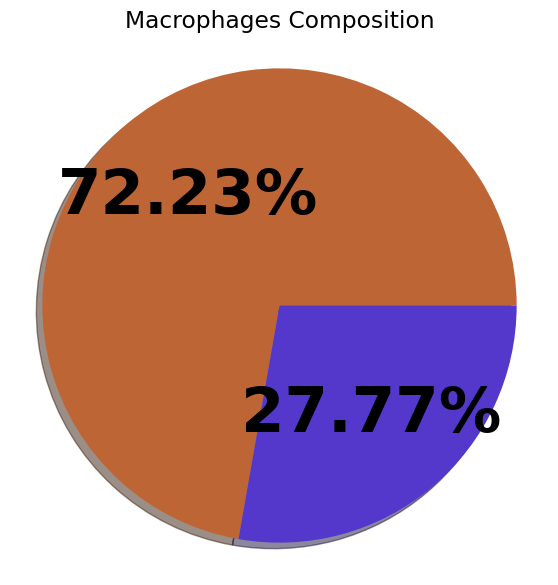

In [158]:
patches, texts, autotexts =plt.pie([float(i) for i in pd.DataFrame(adata_immune.obs.loc[adata_immune.obs['celltype_lowres']=='Macrophages','Donor ID'].value_counts(normalize=True)).reindex(['Donor 1','Donor 2']).values],
              autopct='%1.2f%%',
              colors = donor_palette[0:2], shadow=True, radius=1.1)
plt.setp(autotexts, size=45, weight="bold")
plt.title('Macrophages Composition')
plt.savefig('vis/MacrophagesPie.png',dpi = 300,bbox_inches='tight')

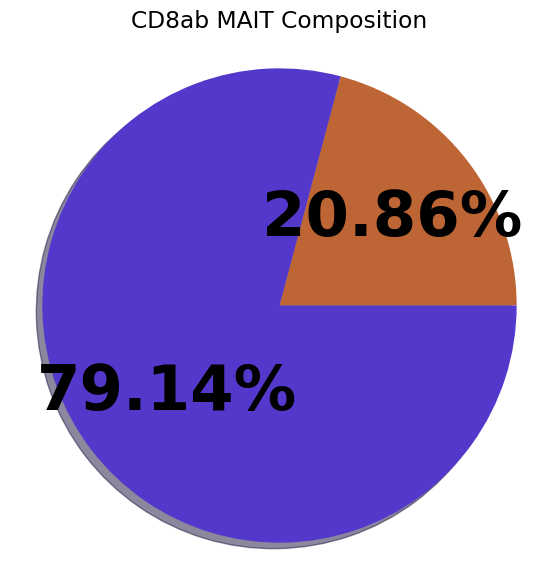

In [159]:
patches, texts, autotexts =plt.pie([float(i) for i in pd.DataFrame(adata_immune.obs.loc[adata_immune.obs['celltype_highres']=='TCRab CD8ab MAIT','Donor ID'].value_counts(normalize=True)).reindex(['Donor 1','Donor 2']).values],
              autopct='%1.2f%%',
              colors = donor_palette[0:2], shadow=True, radius=1.1)
plt.setp(autotexts, size=45, weight="bold")
plt.title('CD8ab MAIT Composition')
plt.savefig('vis/CD8abMAITPie.png',dpi = 300,bbox_inches='tight')